In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import mlflow

In [ ]:
kobe_dataset = pd.read_csv('../data/02_intermediate/kobe_dataset.csv')

In [ ]:
separador = '2PT Field Goal'
filter_2fg_partial = kobe_dataset[kobe_dataset['shot_type'] == separador]
filter_3fg_partial = kobe_dataset[kobe_dataset['shot_type'] != separador]

filter_2fg = filter_2fg_partial[['lat',
                                     'lon',
                                     'minutes_remaining',
                                     'period',
                                     'playoffs',
                                     'shot_distance',
                                     'shot_made_flag']]
filter_3fg = filter_3fg_partial[['lat',
                                     'lon',
                                     'minutes_remaining',
                                     'period',
                                     'playoffs',
                                     'shot_distance',
                                     'shot_made_flag']]

filtered_2fg = filter_2fg.dropna()
filtered_3fg = filter_3fg.dropna()

filtered_2fg.isna().any()

In [26]:
X_without_scaler = filtered_2fg.drop('shot_made_flag', axis=1)
y = filtered_2fg[['shot_made_flag']]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_without_scaler), columns = X_without_scaler.columns, index= X_without_scaler.index)


data_normalized = X.join(y)
data_normalized.isna().any()


lat                  False
lon                  False
minutes_remaining    False
period               False
playoffs             False
shot_distance        False
shot_made_flag       False
dtype: bool

In [27]:
data_train, data_test = train_test_split(data_normalized,
                                        test_size = 0.2, 
                                        random_state = 19,
                                        stratify = data_normalized['shot_made_flag'])

In [88]:
data_train.loc[data_train['shot_made_flag'] == 0]

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11226,-0.232878,1.750661,-0.613407,-0.411069,-0.417991,1.029675,0.0
23766,-0.642634,0.712108,1.431116,-0.411069,-0.417991,0.235957,0.0
3312,-1.204151,-0.069484,-1.489631,-0.411069,-0.417991,0.500529,0.0
26307,0.100997,-0.476339,-0.321333,0.459887,2.392398,-0.557761,0.0
24673,0.586633,-1.675493,-0.321333,-1.282025,-0.417991,0.632816,0.0
...,...,...,...,...,...,...,...
17925,-2.478946,-0.155138,-0.029258,-1.282025,-0.417991,1.558820,0.0
20708,0.950860,0.230305,1.431116,-1.282025,-0.417991,-1.086906,0.0
16386,0.966036,-0.080190,-0.029258,1.330843,-0.417991,-1.351479,0.0
6322,0.783923,0.637161,1.139041,-0.411069,-0.417991,-0.557761,0.0


In [82]:
data_test

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11758,-0.384640,-0.272912,-0.613407,0.459887,-0.417991,-0.160902,1.0
10119,-0.779219,1.236737,1.431116,-1.282025,-0.417991,0.765102,0.0
18742,0.541105,-0.358565,-0.321333,1.330843,-0.417991,-0.954620,0.0
23114,0.966036,-0.080190,-0.613407,1.330843,-0.417991,-1.351479,0.0
18728,0.298286,-0.037364,0.262817,-0.411069,-0.417991,-0.822334,0.0
...,...,...,...,...,...,...,...
9094,1.041917,1.397338,0.554892,0.459887,-0.417991,0.368243,0.0
4514,0.040292,-1.782561,-1.489631,-1.282025,-0.417991,0.897388,0.0
28899,0.131349,0.369492,0.846966,-1.282025,2.392398,-0.557761,0.0
5379,0.966036,-0.080190,1.723190,0.459887,-0.417991,-1.351479,1.0


In [4]:
data_train = pd.read_parquet('../data/04_feature/data_train.parquet')
data_test = pd.read_parquet('../data/04_feature/data_test.parquet')

In [5]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [6]:
y = data_train['shot_made_flag']
X = data_train.drop(columns='shot_made_flag')

clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [7]:
y_true = data_test['shot_made_flag']
X_test = data_test.drop(columns='shot_made_flag')

y_pred = clf.predict(X_test)

report = classification_report(y_true, y_pred, output_dict=True)

In [8]:
report

{'0.0': {'precision': 0.579054743284597,
  'recall': 0.8033018867924528,
  'f1-score': 0.672989527761312,
  'support': 2120},
 '1.0': {'precision': 0.6263440860215054,
  'recall': 0.3608673205988642,
  'f1-score': 0.45791025221094006,
  'support': 1937},
 'accuracy': 0.592063100813409,
 'macro avg': {'precision': 0.6026994146530512,
  'recall': 0.5820846036956585,
  'f1-score': 0.565449889986126,
  'support': 4057},
 'weighted avg': {'precision': 0.6016328692105007,
  'recall': 0.592063100813409,
  'f1-score': 0.5703007043102225,
  'support': 4057}}

In [3]:
from pycaret.classification import *
from sklearn.metrics import log_loss, f1_score

stp = setup(data = data_train, target= 'shot_made_flag', session_id= 19)
add_metric('logloss', 'Log loss', log_loss, greater_is_better = False)

,Description,Value
0,Session id,19
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Name                                                       Log loss
Display Name                                               Log loss
Score Function            <function log_loss at 0x000001B685AD0160>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [4]:
lr_model = create_model('lr', verbose=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:14:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log loss
Fold,,,,,,,,
0,0.5687,0.5864,0.4788,0.5567,0.5149,0.1305,0.1317,6.8766
1,0.5915,0.5970,0.4770,0.5900,0.5275,0.1749,0.1779,6.5117
2,0.5854,0.5982,0.5074,0.5741,0.5387,0.1648,0.1658,6.6099
3,0.5537,0.5763,0.4742,0.5365,0.5034,0.1009,0.1016,7.1151
4,0.5783,0.5856,0.5000,0.5658,0.5309,0.1506,0.1515,6.7222
5,0.5942,0.6184,0.4760,0.5931,0.5281,0.1796,0.1829,6.4696
6,0.5783,0.6014,0.4926,0.5669,0.5271,0.1500,0.1513,6.7222
7,0.5951,0.6167,0.5055,0.5880,0.5437,0.1834,0.1851,6.4555
8,0.5625,0.5684,0.4742,0.5480,0.5084,0.1180,0.1190,6.9748


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
tuned_lr_model = tune_model(lr_model, verbose=True, optimize='logloss')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
y_pred = predict_model(tuned_lr_model, data= data_test)
y_pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log loss
0,Logistic Regression,0.5785,0.6034,0.4827,0.5691,0.5223,0.1497,0.1513,6.7196


,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
11758,33.955299,-118.287804,3,3,0,9,1.0,0,0.5104
10119,33.929298,-118.146797,10,1,0,16,0.0,0,0.5783
18742,34.016300,-118.295799,4,4,0,3,0.0,1,0.5422
23114,34.044300,-118.269798,3,4,0,0,0.0,1,0.5724
18728,34.000301,-118.265800,6,2,0,4,0.0,1,0.5495
...,...,...,...,...,...,...,...,...,...
9094,34.049301,-118.131798,7,3,0,13,0.0,0,0.5788
4514,33.983299,-118.428802,0,1,0,17,0.0,0,0.5824
28899,33.989300,-118.227798,8,1,1,6,0.0,1,0.5429
5379,34.044300,-118.269798,11,3,0,0,1.0,1,0.5790


In [18]:
y_true = data_test['shot_made_flag']
X_test = data_test.drop(columns='shot_made_flag')
y_pred_proba = tuned_lr_model.predict_proba(X_test)
y_pred = predict_model(tuned_lr_model, data= data_test)['prediction_label']

report = classification_report(y_true, y_pred, output_dict= True)
report

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log loss
0,Logistic Regression,0.5785,0.6034,0.4827,0.5691,0.5223,0.1497,0.1513,6.7196


{'0.0': {'precision': 0.5849212924606463,
  'recall': 0.6660377358490566,
  'f1-score': 0.6228495809439788,
  'support': 2120},
 '1.0': {'precision': 0.5690809494826536,
  'recall': 0.4827052142488384,
  'f1-score': 0.5223463687150838,
  'support': 1937},
 'accuracy': 0.5785062854325856,
 'macro avg': {'precision': 0.5770011209716499,
  'recall': 0.5743714750489475,
  'f1-score': 0.5725979748295313,
  'support': 4057},
 'weighted avg': {'precision': 0.5773583779059577,
  'recall': 0.5785062854325856,
  'f1-score': 0.5748646851866779,
  'support': 4057}}

In [1]:
best_model = compare_models()

NameError: name 'compare_models' is not defined

In [31]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=19)

<Axes: ylabel='Frequency'>

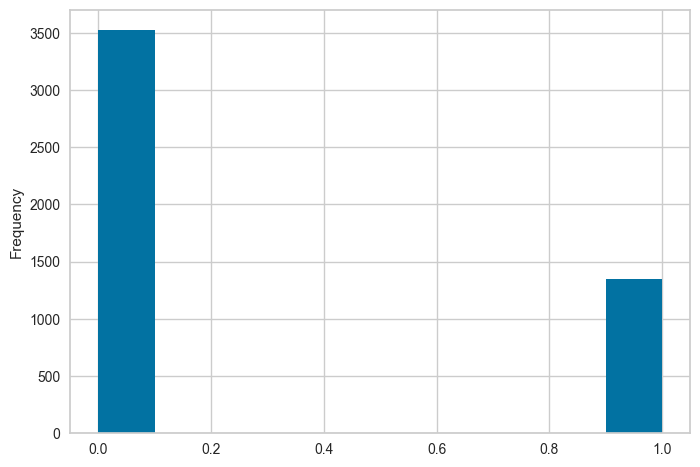

In [40]:
y_pred['prediction_label'].plot(kind='hist')

In [7]:
data_3pt = pd.read_parquet('../data/03_primary/3fg_dataset.parquet')
data_3pt_json = data_3pt.to_json(orient='split', index= False)
data_3pt_json

'{"columns":["lat","lon","minutes_remaining","period","playoffs","shot_distance","shot_made_flag"],"data":[[33.8063,-118.3638,1,3,0,25,0.0],[33.8183,-118.3868,8,2,0,25,1.0],[33.8583,-118.4528,0,3,0,26,0.0],[33.7723,-118.2968,0,2,0,27,1.0],[33.8503,-118.4248,2,1,0,24,0.0],[33.8163,-118.2688,11,2,0,22,1.0],[33.9873,-118.0388,8,1,0,23,0.0],[33.7873,-118.2628,3,1,0,25,1.0],[33.8543,-118.1028,0,2,0,25,0.0],[33.8333,-118.1378,11,1,0,24,0.0],[33.7933,-118.3278,3,2,0,25,1.0],[33.8943,-118.4628,0,2,0,24,0.0],[33.7683,-118.2688,0,2,0,27,1.0],[33.7953,-118.1618,10,2,0,27,0.0],[33.8143,-118.1568,11,4,0,25,1.0],[33.5673,-118.2228,0,2,0,47,0.0],[33.8083,-118.1928,0,3,0,24,0.0],[33.7973,-118.2588,9,4,0,24,0.0],[33.8143,-118.3728,5,4,0,25,0.0],[33.7973,-118.3008,0,4,0,24,1.0],[33.8673,-118.0818,9,1,0,25,0.0],[33.8443,-118.1108,6,2,0,25,1.0],[33.7993,-118.4318,11,3,0,29,0.0],[34.0253,-118.0328,3,3,0,23,1.0],[34.0253,-118.4988,0,3,0,22,1.0],[33.7973,-118.2418,9,1,0,24,0.0],[33.7993,-118.1548,11,4,0,27,0

In [8]:
data_serialized = data_3pt.to_dict(orient='records')
data_serialized

[{'lat': 33.8063,
  'lon': -118.3638,
  'minutes_remaining': 1,
  'period': 3,
  'playoffs': 0,
  'shot_distance': 25,
  'shot_made_flag': 0.0},
 {'lat': 33.8183,
  'lon': -118.3868,
  'minutes_remaining': 8,
  'period': 2,
  'playoffs': 0,
  'shot_distance': 25,
  'shot_made_flag': 1.0},
 {'lat': 33.8583,
  'lon': -118.4528,
  'minutes_remaining': 0,
  'period': 3,
  'playoffs': 0,
  'shot_distance': 26,
  'shot_made_flag': 0.0},
 {'lat': 33.7723,
  'lon': -118.2968,
  'minutes_remaining': 0,
  'period': 2,
  'playoffs': 0,
  'shot_distance': 27,
  'shot_made_flag': 1.0},
 {'lat': 33.8503,
  'lon': -118.4248,
  'minutes_remaining': 2,
  'period': 1,
  'playoffs': 0,
  'shot_distance': 24,
  'shot_made_flag': 0.0},
 {'lat': 33.8163,
  'lon': -118.2688,
  'minutes_remaining': 11,
  'period': 2,
  'playoffs': 0,
  'shot_distance': 22,
  'shot_made_flag': 1.0},
 {'lat': 33.9873,
  'lon': -118.0388,
  'minutes_remaining': 8,
  'period': 1,
  'playoffs': 0,
  'shot_distance': 23,
  'shot_ma

In [19]:
metrics_best_model = pd.read_parquet('../data/08_reporting/metricas_best_model.parquet')
metrics_transform_best = metrics_best_model.loc['value',['Precision_Best_Model','Recall_Best_Model','F1_Score_Best_Model','Accuracy_Best_Model']] * 100
metrics_transform_best['LogLoss_Best_Model'] = metrics_best_model.loc['value','LogLoss_Best_Model'] * 10
metrics_transform_best = pd.DataFrame(metrics_transform_best).T.rename(index={'value':'Best by PyCaret'})
metrics_transform_best = metrics_transform_best.rename(columns = {'LogLoss_Best_Model':'LogLoss',
                                                                  'Precision_Best_Model':'Precision',
                                                                  'Recall_Best_Model':'Recall',
                                                                  'F1_Score_Best_Model':'F1_Score',
                                                                  'Accuracy_Best_Model':'Accuracy'})

metrics_lr_model = pd.read_parquet('../data/08_reporting/metricas_lr_model.parquet')
metrics_transform_lr = metrics_lr_model.loc['value',['Precision','Recall','F1_Score','Accuracy']] * 100
metrics_transform_lr['LogLoss'] = metrics_lr_model.loc['value','LogLoss_Tuned_Lr_Model'] * 10
metrics_transform_lr = pd.DataFrame(metrics_transform_lr).T.rename(index={'value':'Logistic Regression'})

metrics_all = metrics_transform_lr.append(metrics_transform_best)
metrics_all

C:\Users\andre\AppData\Local\Temp\ipykernel_7640\890334507.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_all = metrics_transform_lr.append(metrics_transform_best)


,Precision,Recall,F1_Score,Accuracy,LogLoss
Logistic Regression,57.142857,48.528653,52.484645,58.047819,6.753420
Best by PyCaret,63.291139,36.138358,46.007230,59.502095,6.772826


In [29]:
import requests
url = 'http://localhost:5000/invocations'
data_serialized = data_3pt.to_dict(orient='records')
results = requests.post(url, 
                        json={'dataframe_records':data_serialized},
                        headers= {'Content-type': 'application/json'})

IndentationError: unexpected indent (1170620919.py, line 3)